In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positiveIncrease'])


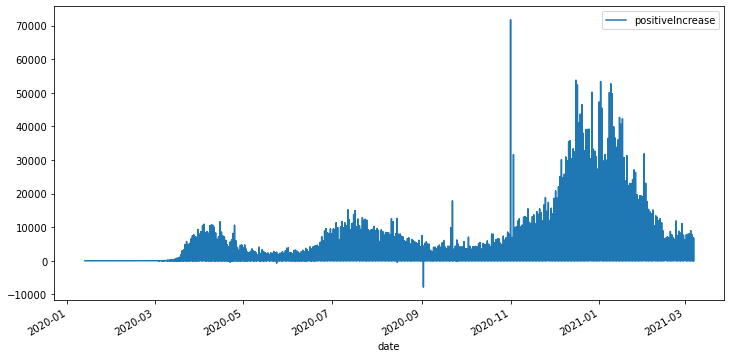

In [405]:
x.plot(figsize=(12,6))

In [406]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az

,state,positiveIncrease
date,,
2020-03-04,AZ,0
2020-03-05,AZ,0
2020-03-06,AZ,1
2020-03-07,AZ,2
2020-03-08,AZ,0
...,...,...
2021-03-03,AZ,1284
2021-03-04,AZ,1154
2021-03-05,AZ,2276


In [407]:
az['rolling_sum']=az['positiveIncrease'].cumsum()

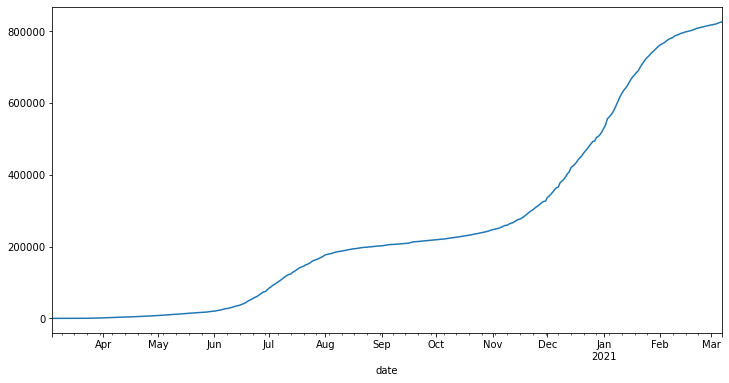

In [408]:
az['rolling_sum'].plot(figsize=(12,6))

In [409]:
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [410]:
az.index

DatetimeIndex(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-06', '2021-03-07'],
              dtype='datetime64[ns]', name='date', length=369, freq=None)

In [411]:
az_train=az.iloc[290:349]
az_test=az.iloc[349:]

In [412]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

import warnings
warnings.filterwarnings('ignore')

In [413]:
fit=auto_arima(az_train,trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1093.060, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1074.337, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1077.502, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1077.260, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1077.043, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1076.304, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.199 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -536.169
Date:                Mon, 31 Jan 2022   AIC                           1074.337
Time:                        00:28:39   BIC                           1076.380
Sample:                             0   HQIC                          1075.131
                                 - 59                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.656e+06   8.37e+05     10.344      0.000    7.02e+06    1.03e+07
===================================================================================
Ljung-Box (Q):                       43.90   Jarque-Bera (JB):                73.12
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [414]:
pred=fit.predict(n_periods =20)

In [415]:
az_test['Predictions']=pred

In [416]:
from statsmodels.tsa.arima_model import ARIMA

In [417]:
#model1=ARIMA(az_train,order=(1,2,2))
#model1_fit=model1.fit()
#model1_fit.summary()

In [418]:
az_test

,rolling_sum,Predictions
date,,
2021-02-16,799738,799944.0
2021-02-17,801053,801282.0
2021-02-18,802196,802620.0
2021-02-19,804114,803958.0
2021-02-20,806161,805296.0
2021-02-21,807965,806634.0
2021-02-22,809472,807972.0
2021-02-23,810656,809310.0
2021-02-24,811966,810648.0


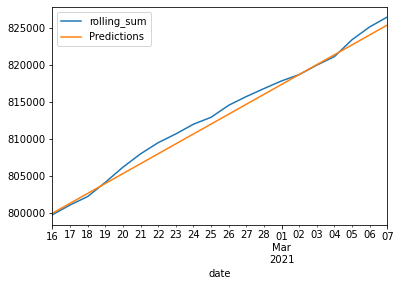

In [419]:
az_test.plot()

In [420]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['rolling_sum'],az_test['Predictions']))
print(rmse)

887.2202375960549


### Moving Average

In [421]:
from statsmodels.tsa.seasonal import seasonal_decompose

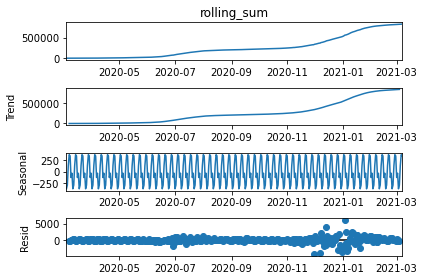

In [422]:
result_add = seasonal_decompose(az['rolling_sum'],model = 'add')
result_add.plot();
#result_mul = seasonal_decompose(az['rolling_sum'],model = 'mul')
#result_mul.plot();

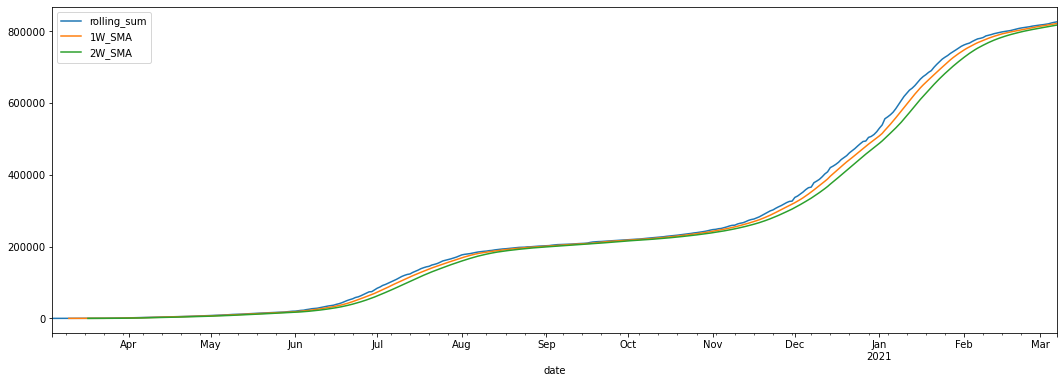

In [394]:
az['1W_SMA'] = az['rolling_sum'].rolling(window=7).mean()
az['2W_SMA'] = az['rolling_sum'].rolling(window=14).mean()
az[['rolling_sum','1W_SMA','2W_SMA']].plot(figsize=(18,6))

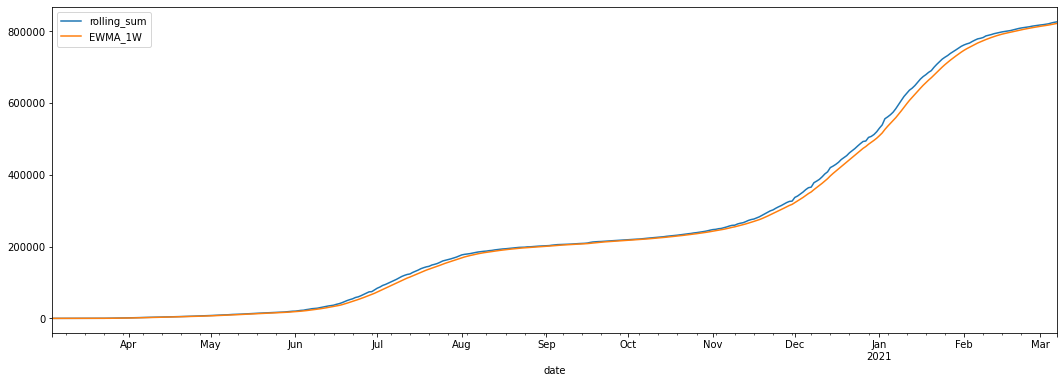

In [423]:
az['EWMA_1W'] = az['rolling_sum'].ewm(span=7,adjust=False).mean()
az[['rolling_sum','EWMA_1W']].plot(figsize = (18,6));

In [424]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

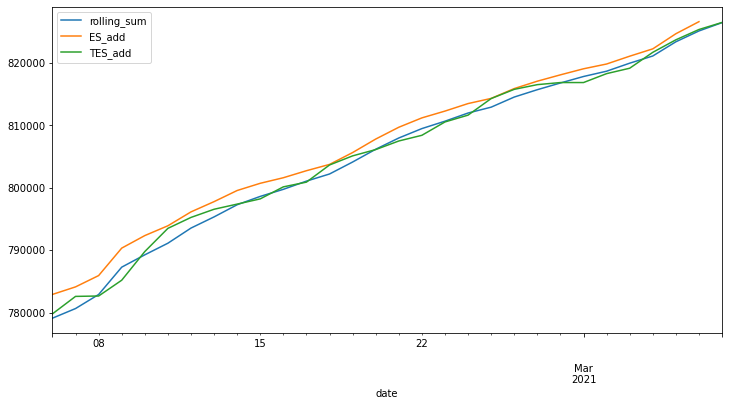

In [425]:
az['ES_add'] = ExponentialSmoothing(az['rolling_sum'],trend='add').fit().fittedvalues.shift(-1)
az['TES_add'] = ExponentialSmoothing(az['rolling_sum'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
az[['rolling_sum','ES_add','TES_add']].iloc[-30:].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [479]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [480]:
az['1W_SMA'] = az['rolling_sum'].rolling(window=7).mean()

In [481]:
az=az.dropna()
az

,rolling_sum,1W_SMA
date,,
2020-03-10,4,2.000000
2020-03-11,7,3.000000
2020-03-12,7,4.000000
2020-03-13,7,4.857143
2020-03-14,10,5.857143
...,...,...
2021-03-03,819952,816622.142857
2021-03-04,821106,817793.714286
2021-03-05,823382,819058.857143


In [482]:
az_train=az[:313]
az_test=az[313:]

In [483]:
az_train

,rolling_sum,1W_SMA
date,,
2020-03-10,4,2.000000
2020-03-11,7,3.000000
2020-03-12,7,4.000000
2020-03-13,7,4.857143
2020-03-14,10,5.857143
...,...,...
2021-01-12,636098,606434.571429
2021-01-13,641727,616013.000000
2021-01-14,649038,625219.714286


In [484]:
az_test

,rolling_sum,1W_SMA
date,,
2021-01-17,673880,650480.714286
2021-01-18,679280,657872.285714
2021-01-19,685697,664957.857143
2021-01-20,690542,671931.428571
2021-01-21,699940,679203.142857
2021-01-22,708039,686325.285714
2021-01-23,715355,693247.571429
2021-01-24,722572,700203.571429
2021-01-25,727893,707148.285714


In [485]:
az_test

,rolling_sum,1W_SMA
date,,
2021-01-17,673880,650480.714286
2021-01-18,679280,657872.285714
2021-01-19,685697,664957.857143
2021-01-20,690542,671931.428571
2021-01-21,699940,679203.142857
2021-01-22,708039,686325.285714
2021-01-23,715355,693247.571429
2021-01-24,722572,700203.571429
2021-01-25,727893,707148.285714


In [486]:
model1= ExponentialSmoothing(az_train['1W_SMA'],trend='add').fit()

In [487]:
predictions = model1.forecast(50)

In [488]:
az_test['Predictions']= predictions

In [489]:
az_test

,rolling_sum,1W_SMA,Predictions
date,,,
2021-01-17,673880,650480.714286,6.511210e+05
2021-01-18,679280,657872.285714,6.596462e+05
2021-01-19,685697,664957.857143,6.681715e+05
2021-01-20,690542,671931.428571,6.766968e+05
2021-01-21,699940,679203.142857,6.852221e+05
2021-01-22,708039,686325.285714,6.937474e+05
2021-01-23,715355,693247.571429,7.022727e+05
2021-01-24,722572,700203.571429,7.107979e+05
2021-01-25,727893,707148.285714,7.193232e+05


### 1 Week moving average

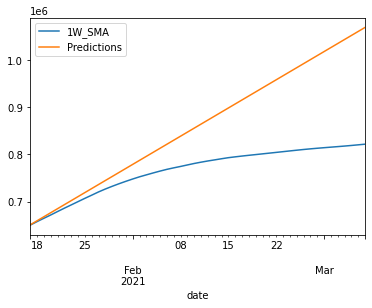

In [490]:
az_test[['1W_SMA','Predictions']].plot()

In [491]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['1W_SMA'],az_test['Predictions']))
print(rmse)

122322.52625833882


In [471]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [472]:
az['2W_SMA'] = az['rolling_sum'].rolling(window=14).mean()

In [473]:
az=az.dropna()
az

,rolling_sum,2W_SMA
date,,
2020-03-17,18,6.357143
2020-03-18,26,8.214286
2020-03-19,42,11.214286
2020-03-20,63,15.642857
2020-03-21,102,22.714286
...,...,...
2021-03-03,819952,812063.214286
2021-03-04,821106,813413.928571
2021-03-05,823382,814790.214286


In [474]:
az_train=az[:306]
az_test=az[306:]

In [475]:
model1= ExponentialSmoothing(az_train['2W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [476]:
az_test

,rolling_sum,2W_SMA,Predictions
date,,,
2021-01-17,673880,618841.571429,6.195739e+05
2021-01-18,679280,627251.571429,6.286990e+05
2021-01-19,685697,635696.214286,6.378241e+05
2021-01-20,690542,643972.214286,6.469491e+05
2021-01-21,699940,652211.428571,6.560742e+05
2021-01-22,708039,660196.428571,6.651993e+05
2021-01-23,715355,667911.571429,6.743243e+05
2021-01-24,722572,675342.142857,6.834494e+05
2021-01-25,727893,682510.285714,6.925745e+05


## 2 Week Moving Average

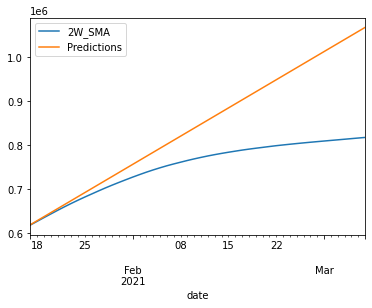

In [477]:
az_test[['2W_SMA','Predictions']].plot()

In [478]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['2W_SMA'],az_test['Predictions']))
print(rmse)

120557.31003818581


In [460]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [461]:
az['1M_SMA'] = az['rolling_sum'].rolling(window=30).mean()
az

,rolling_sum,1M_SMA
date,,
2020-03-04,0,NaN
2020-03-05,0,NaN
2020-03-06,1,NaN
2020-03-07,3,NaN
2020-03-08,3,NaN
...,...,...
2021-03-03,819952,798149.900000
2021-03-04,821106,800017.400000
2021-03-05,823382,801884.233333


In [463]:
az=az.dropna()
az

,rolling_sum,1M_SMA
date,,
2020-04-02,1596,336.133333
2020-04-03,1767,395.033333
2020-04-04,2017,462.266667
2020-04-05,2267,537.800000
2020-04-06,2454,619.500000
...,...,...
2021-03-03,819952,798149.900000
2021-03-04,821106,800017.400000
2021-03-05,823382,801884.233333


In [464]:
az_train=az[:290]
az_test=az[290:]

In [465]:
model1= ExponentialSmoothing(az_train['1M_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [466]:
az_test

,rolling_sum,1M_SMA,Predictions
date,,,
2021-01-17,673880,553072.833333,553094.618713
2021-01-18,679280,560774.533333,560823.447089
2021-01-19,685697,568511.266667,568552.275466
2021-01-20,690542,576151.233333,576281.103842
2021-01-21,699940,583908.800000,584009.932219
2021-01-22,708039,591734.400000,591738.760595
2021-01-23,715355,599569.000000,599467.588971
2021-01-24,722572,607423.633333,607196.417348
2021-01-25,727893,615252.100000,614925.245724


### 30 Day/1 Month Moving Average

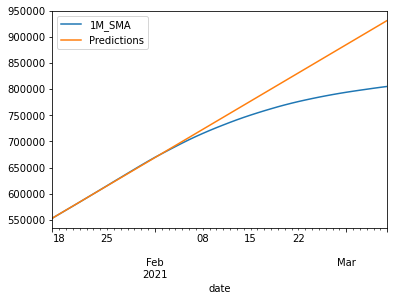

In [467]:
az_test[['1M_SMA','Predictions']].plot()

In [468]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['1M_SMA'],az_test['Predictions']))
print(rmse)

51206.88688940198


In [ ]:
#run exponrntial smoothing on positiveIncrease 
#experiment exponrntial smoothing with window of 20-25-35-40

###  exponrntial smoothing with window of 20

In [498]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [499]:
az['20d_SMA'] = az['rolling_sum'].rolling(window=20).mean()

In [500]:
az=az.dropna()
az

,rolling_sum,20d_SMA
date,,
2020-03-23,263,36.75
2020-03-24,355,54.50
2020-03-25,448,76.90
2020-03-26,575,105.60
2020-03-27,734,142.15
...,...,...
2021-03-03,819952,807720.05
2021-03-04,821106,809098.85
2021-03-05,823382,810501.90


In [501]:
az_train=az[:300]
az_test=az[300:]

In [502]:
model1= ExponentialSmoothing(az_train['20d_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [503]:
az_test

,rolling_sum,20d_SMA,Predictions
date,,,
2021-01-17,673880,591474.45,5.916296e+05
2021-01-18,679280,600077.45,6.002577e+05
2021-01-19,685697,608737.95,6.088859e+05
2021-01-20,690542,617254.80,6.175140e+05
2021-01-21,699940,625738.55,6.261422e+05
2021-01-22,708039,634183.10,6.347703e+05
2021-01-23,715355,642131.75,6.433984e+05
2021-01-24,722572,650183.35,6.520266e+05
2021-01-25,727893,658204.40,6.606547e+05


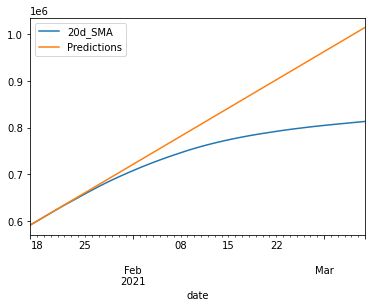

In [504]:
az_test[['20d_SMA','Predictions']].plot()

In [505]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['20d_SMA'],az_test['Predictions']))
print(rmse)

91630.8234064305


### exponrntial smoothing with window of 25

In [506]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [507]:
az['25d_SMA'] = az['rolling_sum'].rolling(window=25).mean()


In [508]:
az=az.dropna()
az

,rolling_sum,25d_SMA
date,,
2020-03-28,871,148.72
2020-03-29,917,185.40
2020-03-30,1155,231.60
2020-03-31,1287,283.04
2020-04-01,1411,339.36
...,...,...
2021-03-03,819952,803421.36
2021-03-04,821106,805040.20
2021-03-05,823382,806660.08


In [509]:
az_train=az[:295]
az_test=az[295:]

In [510]:
model1= ExponentialSmoothing(az_train['25d_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [511]:
az_test

,rolling_sum,25d_SMA,Predictions
date,,,
2021-01-17,673880,571541.36,571504.411453
2021-01-18,679280,579499.88,579491.834286
2021-01-19,685697,587450.44,587479.257120
2021-01-20,690542,595350.56,595466.679954
2021-01-21,699940,603574.76,603454.102787
2021-01-22,708039,611719.48,611441.525621
2021-01-23,715355,620044.88,619428.948455
2021-01-24,722572,628448.28,627416.371288
2021-01-25,727893,636755.80,635403.794122


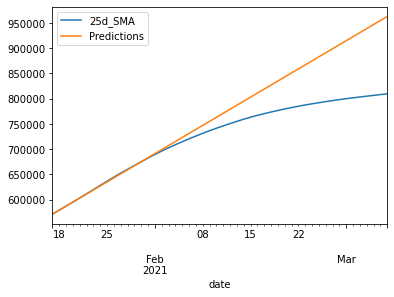

In [512]:
az_test[['25d_SMA','Predictions']].plot()

In [513]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['25d_SMA'],az_test['Predictions']))
print(rmse)

65093.02008802237


#### exponrntial smoothing with window of 35

In [514]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [515]:
az['35d_SMA'] = az['rolling_sum'].rolling(window=35).mean()


In [516]:
az=az.dropna()
az

,rolling_sum,35d_SMA
date,,
2020-04-07,2573,604.628571
2020-04-08,2724,682.457143
2020-04-09,3016,768.628571
2020-04-10,3110,857.457143
2020-04-11,3391,954.257143
...,...,...
2021-03-03,819952,791711.628571
2021-03-04,821106,793936.657143
2021-03-05,823382,796083.057143


In [518]:
az_train=az[:285]
az_test=az[285:]

In [519]:
model1= ExponentialSmoothing(az_train['35d_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [520]:
az_test

,rolling_sum,35d_SMA,Predictions
date,,,
2021-01-17,673880,535535.171429,535502.943567
2021-01-18,679280,542936.142857,543054.717529
2021-01-19,685697,550402.342857,550606.491492
2021-01-20,690542,557868.771429,558158.265454
2021-01-21,699940,565437.514286,565710.039417
2021-01-22,708039,573019.514286,573261.813379
2021-01-23,715355,580651.685714,580813.587341
2021-01-24,722572,588336.742857,588365.361304
2021-01-25,727893,595952.457143,595917.135266


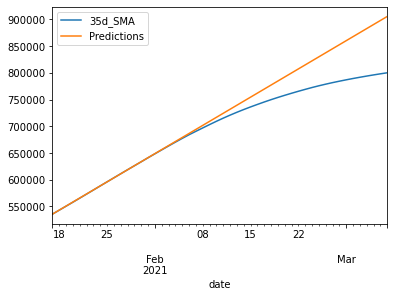

In [521]:
az_test[['35d_SMA','Predictions']].plot()

In [522]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['35d_SMA'],az_test['Predictions']))
print(rmse)

41064.76110681969


### exponrntial smoothing with window of 40

In [523]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [524]:
az['40d_SMA'] = az['rolling_sum'].rolling(window=40).mean()


In [525]:
az=az.dropna()
az

,rolling_sum,40d_SMA
date,,
2020-04-12,3537,923.500
2020-04-13,3700,1016.000
2020-04-14,3804,1111.100
2020-04-15,3960,1210.075
2020-04-16,4232,1315.800
...,...,...
2021-03-03,819952,783673.175
2021-03-04,821106,786316.950
2021-03-05,823382,788837.200


In [526]:
az_train=az[:280]
az_test=az[280:]

In [527]:
model1= ExponentialSmoothing(az_train['40d_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [528]:
az_test

,rolling_sum,40d_SMA,Predictions
date,,,
2021-01-17,673880,517984.850,518118.131023
2021-01-18,679280,525401.875,525644.554832
2021-01-19,685697,532856.125,533170.978641
2021-01-20,690542,540256.925,540697.402450
2021-01-21,699940,547690.750,548223.826259
2021-01-22,708039,555180.725,555750.250068
2021-01-23,715355,562558.450,563276.673877
2021-01-24,722572,570013.250,570803.097686
2021-01-25,727893,577480.150,578329.521495


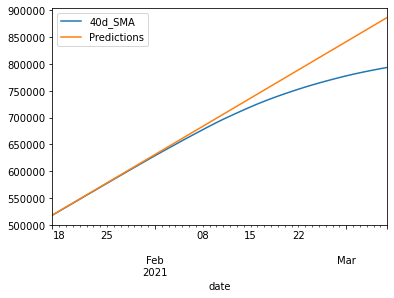

In [529]:
az_test[['40d_SMA','Predictions']].plot()

In [530]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['40d_SMA'],az_test['Predictions']))
print(rmse)

36005.458861634244


### exponential smoothing on positiveIncrease

In [534]:
x=pd.read_csv('all-states-history.csv',index_col='date',parse_dates=True,usecols=['date','state','positiveIncrease'])

In [536]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az

,state,positiveIncrease
date,,
2020-03-04,AZ,0
2020-03-05,AZ,0
2020-03-06,AZ,1
2020-03-07,AZ,2
2020-03-08,AZ,0
...,...,...
2021-03-03,AZ,1284
2021-03-04,AZ,1154
2021-03-05,AZ,2276


In [537]:
from statsmodels.tsa.seasonal import seasonal_decompose

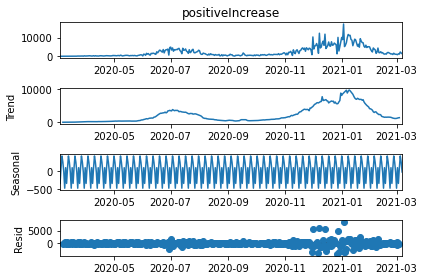

In [538]:
result_add = seasonal_decompose(az['positiveIncrease'],model = 'add')
result_add.plot();

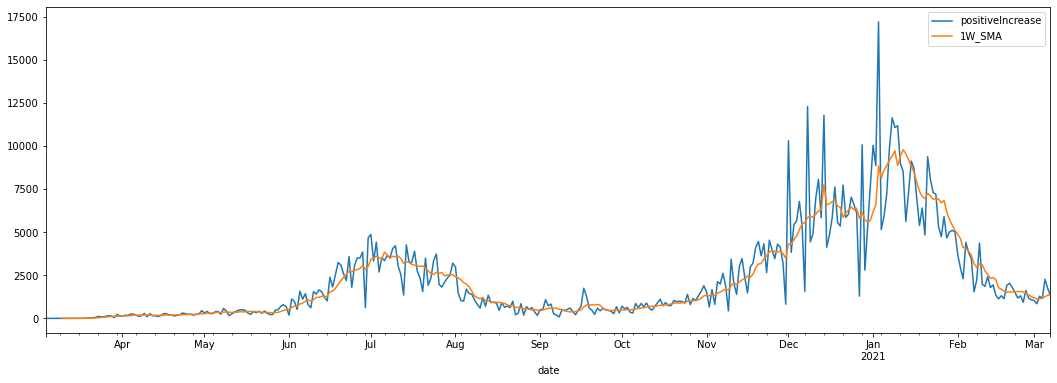

In [539]:
az['1W_SMA'] = az['positiveIncrease'].rolling(window=7).mean()
az[['positiveIncrease','1W_SMA']].plot(figsize=(18,6))

In [540]:
az

,state,positiveIncrease,1W_SMA
date,,,
2020-03-04,AZ,0,NaN
2020-03-05,AZ,0,NaN
2020-03-06,AZ,1,NaN
2020-03-07,AZ,2,NaN
2020-03-08,AZ,0,NaN
...,...,...,...
2021-03-03,AZ,1284,1140.857143
2021-03-04,AZ,1154,1171.571429
2021-03-05,AZ,2276,1265.142857


In [541]:
az=az.dropna()
az

,state,positiveIncrease,1W_SMA
date,,,
2020-03-10,AZ,1,0.571429
2020-03-11,AZ,3,1.000000
2020-03-12,AZ,0,1.000000
2020-03-13,AZ,0,0.857143
2020-03-14,AZ,3,1.000000
...,...,...,...
2021-03-03,AZ,1284,1140.857143
2021-03-04,AZ,1154,1171.571429
2021-03-05,AZ,2276,1265.142857


In [543]:
az_train=az[:313]
az_test=az[313:]

In [544]:
model1= ExponentialSmoothing(az_train['1W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [545]:
az_test

,state,positiveIncrease,1W_SMA,Predictions
date,,,,
2021-01-17,AZ,6981,7905.142857,8647.249364
2021-01-18,AZ,5400,7391.571429,8719.507641
2021-01-19,AZ,6417,7085.571429,8791.765919
2021-01-20,AZ,4845,6973.571429,8864.024196
2021-01-21,AZ,9398,7271.714286,8936.282474
2021-01-22,AZ,8099,7122.142857,9008.540751
2021-01-23,AZ,7316,6922.285714,9080.799029
2021-01-24,AZ,7217,6956.000000,9153.057306
2021-01-25,AZ,5321,6944.714286,9225.315584


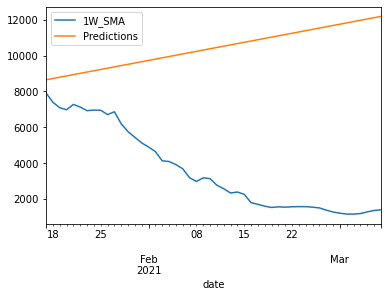

In [546]:
az_test[['1W_SMA','Predictions']].plot()

In [547]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['1W_SMA'],az_test['Predictions']))
print(rmse)

7582.77178249337


In [548]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az

,state,positiveIncrease
date,,
2020-03-04,AZ,0
2020-03-05,AZ,0
2020-03-06,AZ,1
2020-03-07,AZ,2
2020-03-08,AZ,0
...,...,...
2021-03-03,AZ,1284
2021-03-04,AZ,1154
2021-03-05,AZ,2276


In [549]:
az['2W_SMA'] = az['positiveIncrease'].rolling(window=14).mean()

In [550]:
az=az.dropna()
az

,state,positiveIncrease,2W_SMA
date,,,
2020-03-17,AZ,2,1.285714
2020-03-18,AZ,8,1.857143
2020-03-19,AZ,16,3.000000
2020-03-20,AZ,21,4.428571
2020-03-21,AZ,39,7.071429
...,...,...,...
2021-03-03,AZ,1284,1349.928571
2021-03-04,AZ,1154,1350.714286
2021-03-05,AZ,2276,1376.285714


In [551]:
az_train=az[:306]
az_test=az[306:]

In [552]:
model1= ExponentialSmoothing(az_train['2W_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [553]:
az_test

,state,positiveIncrease,2W_SMA,Predictions
date,,,,
2021-01-17,AZ,6981,8392.714286,9259.590128
2021-01-18,AZ,5400,8410.000000,9371.877742
2021-01-19,AZ,6417,8444.642857,9484.165356
2021-01-20,AZ,4845,8276.000000,9596.452970
2021-01-21,AZ,9398,8239.214286,9708.740584
2021-01-22,AZ,8099,7985.000000,9821.028198
2021-01-23,AZ,7316,7715.142857,9933.315812
2021-01-24,AZ,7217,7430.571429,10045.603426
2021-01-25,AZ,5321,7168.142857,10157.891041


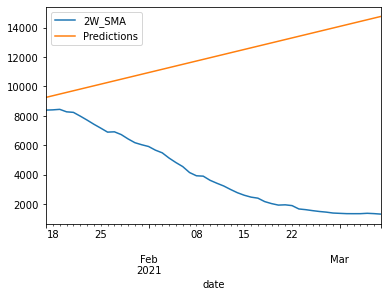

In [555]:
az_test[['2W_SMA','Predictions']].plot()

In [557]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['2W_SMA'],az_test['Predictions']))
print(rmse)

8870.896270391155


In [558]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az

,state,positiveIncrease
date,,
2020-03-04,AZ,0
2020-03-05,AZ,0
2020-03-06,AZ,1
2020-03-07,AZ,2
2020-03-08,AZ,0
...,...,...
2021-03-03,AZ,1284
2021-03-04,AZ,1154
2021-03-05,AZ,2276


In [559]:
az['1M_SMA'] = az['positiveIncrease'].rolling(window=30).mean()

In [560]:
az=az.dropna()
az

,state,positiveIncrease,1M_SMA
date,,,
2020-04-02,AZ,185,53.200000
2020-04-03,AZ,171,58.900000
2020-04-04,AZ,250,67.233333
2020-04-05,AZ,250,75.533333
2020-04-06,AZ,187,81.700000
...,...,...,...
2021-03-03,AZ,1284,1926.966667
2021-03-04,AZ,1154,1867.500000
2021-03-05,AZ,2276,1866.833333


In [561]:
az_train=az[:290]
az_test=az[290:]

In [562]:
model1= ExponentialSmoothing(az_train['1M_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

In [563]:
az_test

,state,positiveIncrease,1M_SMA,Predictions
date,,,,
2021-01-17,AZ,6981,7707.033333,7786.413994
2021-01-18,AZ,5400,7701.700000,7858.498323
2021-01-19,AZ,6417,7736.733333,7930.582652
2021-01-20,AZ,4845,7639.966667,8002.666980
2021-01-21,AZ,9398,7757.566667,8074.751309
2021-01-22,AZ,8099,7825.600000,8146.835638
2021-01-23,AZ,7316,7834.600000,8218.919967
2021-01-24,AZ,7217,7854.633333,8291.004296
2021-01-25,AZ,5321,7828.466667,8363.088624


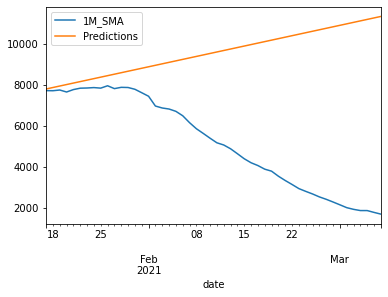

In [565]:
az_test[['1M_SMA','Predictions']].plot()

In [567]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['1M_SMA'],az_test['Predictions']))
print(rmse)

5448.5368716703


### 60 Day Window - optimal window

In [34]:
az=x.query('state == "AZ"')
az=az.iloc[::-1]
az['rolling_sum']=az['positiveIncrease'].cumsum()
az=az[['rolling_sum']]
az

,rolling_sum
date,
2020-03-04,0
2020-03-05,0
2020-03-06,1
2020-03-07,3
2020-03-08,3
...,...
2021-03-03,819952
2021-03-04,821106
2021-03-05,823382


In [35]:
az['80d_SMA'] = az['rolling_sum'].rolling(window=80).mean()

In [36]:
az=az.dropna()
az

,rolling_sum,80d_SMA
date,,
2020-05-22,15606,4929.1625
2020-05-23,16037,5129.6250
2020-05-24,16337,5333.8375
2020-05-25,16559,5540.8125
2020-05-26,16781,5750.5375
...,...,...
2021-03-03,819952,669426.9500
2021-03-04,821106,674437.7000
2021-03-05,823382,679425.2250


In [37]:
az_train=az[:240]
az_test=az[240:]

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model1= ExponentialSmoothing(az_train['80d_SMA'],trend='add').fit()
predictions = model1.forecast(50)
az_test['Predictions']= predictions

C:\Users\akars\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\akars\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-38-bad733c6f833>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  az_test['Predictions']= predictions


In [39]:
az_test

,rolling_sum,80d_SMA,Predictions
date,,,
2021-01-17,673880,406105.1125,406034.2875
2021-01-18,679280,411545.5750,411355.9875
2021-01-19,685697,417042.4875,416677.6875
2021-01-20,690542,422580.8750,421999.3875
2021-01-21,699940,428228.4125,427321.0875
2021-01-22,708039,433956.2000,432642.7875
2021-01-23,715355,439765.2500,437964.4875
2021-01-24,722572,445637.8250,443286.1875
2021-01-25,727893,451551.9625,448607.8875


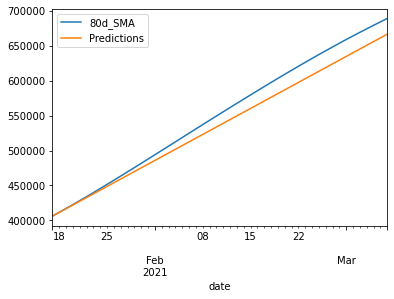

In [40]:
az_test[['80d_SMA','Predictions']].plot()

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(az_test['80d_SMA'],az_test['Predictions']))
print(rmse)

16682.05047301694
